Fantastic — your answers make it clear: we're building a **free-thinking, risk-aware, market-grounded learning trader**, with the potential to become not just profitable, but deeply **adaptive** and **introspective**. This will be like training a real human trader, starting simple and layering on cognition and tools.

---

## ✅ Summary of Your Vision

| Category              | Your Decision                                                          |
| --------------------- | ---------------------------------------------------------------------- |
| **Self-Awareness**    | Track PnL, trade history, confidence per trade                         |
| **Market Context**    | Allow multi-timeframe (1D, 1W, maybe 1H later), and any usable feature |
| **External Signals**  | Include events like earnings/fed/news if available                     |
| **Risk Management**   | Wants liquidation/capital erosion + learned position sizing (v2+)      |
| **Strategy Modeling** | Enable strategy playbooks and adaptive behavior                        |
| **Meta-Learning**     | Agent should retain memory of past conditions, learn from meta-signals |
| **Limitations**       | No peeking into future — only prediction from available past           |

---

## 🎯 Now Here's the Plan: "The Trader Intelligence Stack"

We'll organize this into **four layers** that build on each other. Each layer adds trader-like qualities and improves survivability and strategy creation.

---

### **🔹 Layer 1: Survival & Orientation (v1)**

> Minimal working agent that can hold/sell one stock, one timeframe, rewarded by position-based score.

**Inputs:**

* OHLCV (daily)
* Agent’s current position
* Time since position opened
* Estimated profit/loss if selling now

**Internal features:**

* Current PnL (unrealized)
* Position duration
* Action history (last N actions — optional at this stage)

**Reward:**

* Oracle-relative reward between 0–100 per episode (✅ already implemented)

**Goal:** Learn to enter/exit positions intelligently on one stock.

---

### **🔹 Layer 2: Market Perception & Meta-Features**

> Now the agent *reads the environment*, and we open it to *multi-feature* inputs.

**Additions:**

* Volatility, momentum, kurtosis, entropy, regime label, VIX, etc.
* Optional: add price features from 3-day, 1-week trailing windows

**Goal:** Learn to recognize **conditions** that precede profitable trends.

---

### **🔹 Layer 3: Portfolio & Risk Awareness**

> The agent now becomes a risk-aware trader.

**Additions:**

* Realized volatility, trailing drawdown
* Simulated liquidation: episode ends if capital drops below X%
* Optional: reward penalty for big drawdowns

**Later upgrade:**

* Learn dynamic position sizing (0%, 25%, 50%, 100%) or continuous size

**Goal:** Survive, control risk, avoid death by bad trades.

---

### **🔹 Layer 4: Strategic Thinking & Memory**

> Agent becomes *introspective* and *adaptive* — career-trader-level.

**Additions:**

* Confidence score (learned or predicted)
* Episodic memory (compare current conditions to prior wins/losses)
* Strategy archetype detection (trend following, mean reversion, etc.)
* Meta-reward: evaluate *how well the agent acted*, not just profit

**Goal:** Develop strategic behavior that generalizes to new situations.

---

### **🔹 Layer 5: Real World Awareness (Optional Later)**

> External signals from scraping/news pipelines and macro indicators.

* Earnings day, Fed announcement, news sentiment
* Sector rotation features (sector-relative strength)
* Macro ETFs (SPY, QQQ, TLT, etc.)

---

## ✅ Next Step: We Start at Layer 1

Let’s:

1. **Solidify internal features**: PnL, duration, trade history, position status.
2. **Wrap it into the `PositionTradingEnv`** — this becomes part of the observation.
3. **Optionally**: Add rolling average reward, confidence, or simple position score.

---

### 🔧 Can I proceed to implement a Layer 1 `env.get_observation()` that includes:

* Agent's current position (0 = flat, 1 = long)
* Time since entry
* Unrealized PnL (oracle-relative)
* Normalized current price vs. entry price
* One-hot day-of-week (already done)
* Rolling average return over past N days
* Optional: last 3 actions (as one-hot vectors)

?

Once this is done, we’ll run the first agent and start logging learnability under **"Survival Mode"**.

Ready to code this?


In [1]:
import jupyter

In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt


from src.utils.system import boot
from src.data.feature_pipeline import load_base_dataframe
from experiments import check_if_experiment_exists, register_experiment ,experiment_hash
from environments import PositionTradingEnv,PositionTradingEnvV1, PositionTradingEnvV2

# ========== SYSTEM BOOT ==========
DEVICE = boot()
EXPERIMENT_NAME = "trading_environment_development"
DEFAULT_PATH = "data/experiments/" + EXPERIMENT_NAME

# ========== CONFIG ==========
TICKER = "AAPL"
TIMESTEPS = 10_000
EVAL_EPISODES = 5
N_TIMESTEPS = 60
LOOKBACK = 0
SEEDS = [42, 52, 62]
MARKET_FEATURES = ['close']
BENCHMARK_PATH = DEFAULT_PATH+"/benchmark_episodes.json"
CHECKPOINT_DIR = DEFAULT_PATH+"/checkpoints"
SCORES_DIR = DEFAULT_PATH+"/scores"
META_PATH = DEFAULT_PATH+"/meta_df.csv"

MARKET_FEATURES.sort()
SEEDS.sort()

DEVICE = boot()
OHLCV_DF = load_base_dataframe()

In [ ]:
e.reset()
print('price', e.prices[e.step_idx])
a,b,c,d,_ =e.step(1)
print('price',e.prices[e.step_idx], 'reward',b)
a,b,c,d,_ =e.step(1)
print('price',e.prices[e.step_idx], 'reward',b)
a,b,c,d,_ =e.step(1)
print('price',e.prices[e.step_idx], 'reward',b)


In [ ]:
e.reset()
print(e.prices[e.step_idx])
a,b,c,d,_ =e.step(0)
print(b, e.prices[e.step_idx])
a,b,c,d,_ =e.step(0)
print(b,e.prices[e.step_idx])
a,b,c,d,_ =e.step(0)
print(b,e.prices[e.step_idx])

In [ ]:
e = PositionTradingEnvV1(OHLCV_DF[OHLCV_DF['symbol']==TICKER], ticker=TICKER, seed=42, start_idx=4)
print("Sum of raw rel returns:", np.sum([
    abs((e.prices[i + 1] - e.prices[i]) / e.prices[i])
    for i in range(len(e.prices) - 1)
]))

print("Sum of normalized weights:", np.sum(e.step_weights))  # This should be 1.0

In [ ]:
e.

In [ ]:
.2* np.sign(10.02)

In [ ]:
result_df = pd.read_csv(DEFAULT_PATH+"/meta_df_transfer.csv")
result_df.groupby(['env_version','agent_name']).mean(numeric_only=True).T

In [ ]:
import json
best_transferable = result_df.sort_values(by="transfer_delta",ascending=False).iloc[0]
best_transferable_config = json.loads(best_transferable['config'])

In [ ]:
best_transferable2 = result_df.sort_values(by="transfer_delta",ascending=False).iloc[10]
best_transferable_config2 = json.loads(best_transferable2['config'])
best_transferable_config2

Here’s a full breakdown of each column in your benchmark dataframe and what it represents:

---

## 📊 **DataFrame Column Meanings**

| Column                | Type  | Description                                               |
| --------------------- | ----- | --------------------------------------------------------- |
| **mean\_return**      | float | Mean of 1-day returns over the episode (market baseline)  |
| **median\_return**    | float | Median daily return over the episode                      |
| **std\_return**       | float | Standard deviation of returns (volatility estimate)       |
| **skew\_return**      | float | Skewness of returns (positive = long tail on right)       |
| **kurtosis\_return**  | float | Kurtosis of returns (tail risk/heaviness)                 |
| **return\_trend**     | float | Slope of a linear trend fitted to the return series       |
| **ewm\_mean\_return** | float | Exponentially weighted moving average of returns          |
| **hurst**             | float | Hurst exponent (predictability/mean-reversion: <0.5)      |
| **adf\_stat**         | float | Augmented Dickey-Fuller test statistic (stationarity)     |
| **adf\_pval**         | float | ADF test p-value (p < 0.05 = likely stationary)           |
| **entropy**           | float | Information entropy of the return series (chaotic = high) |

---

| Column                | Type   | Description                                          |
| --------------------- | ------ | ---------------------------------------------------- |
| **config\_hash**      | object | Unique ID for the agent + env config used            |
| **env\_version**      | object | Environment version (`v0`, `v1`, etc.)               |
| **agent\_name**       | object | Agent type used (e.g. `PPO`, `A2C`)                  |
| **score\_train**      | float  | Total normalized score (0–100) on training episode   |
| **score\_test**       | float  | Same as above, on test episode                       |
| **advantage\_train**  | float  | PPO score − random score on train                    |
| **advantage\_test**   | float  | PPO score − random score on test                     |
| **transfer\_delta**   | float  | `score_test − score_train` (generalization quality)  |
| **transfer\_success** | int    | 1 if advantage\_test > 0 (agent beat random), else 0 |

---

| Column             | Type   | Description                                |
| ------------------ | ------ | ------------------------------------------ |
| **ticker**         | object | Stock symbol (e.g., AAPL, MSFT)            |
| **seed**           | int    | Random seed for episode sampling           |
| **train\_idx**     | int    | Index of training episode start            |
| **test\_idx**      | int    | Index of test episode start                |
| **timesteps**      | int    | Number of agent training steps             |
| **episode\_steps** | int    | Number of environment steps in the episode |

---

| Column            | Type  | Description                        |
| ----------------- | ----- | ---------------------------------- |
| **volatility**    | float | Std. dev. of episode price returns |
| **max\_drawdown** | float | Max % drop from a peak to trough   |
| **sharpe**        | float | Return / Volatility                |
| **sortino**       | float | Return / Downside Volatility       |
| **calmar**        | float | Return / Max Drawdown              |

---

| Column                           | Type   | Description                                                                            |
| -------------------------------- | ------ | -------------------------------------------------------------------------------------- |
| **success\_trades**              | int    | Number of profitable trades in the episode                                             |
| **action\_hold\_ratio**          | float  | % of actions that were "wait" (0)                                                      |
| **action\_long\_ratio**          | float  | % of actions that were "buy/sell" (1)                                                  |
| **agent\_config**                | object | (currently empty) placeholder for agent config JSON                                    |
| **env\_config.market\_features** | object | List of features used by the environment (e.g., `['close', 'volatility', 'momentum']`) |

---

## 🧠 Bonus Insights

* **score\_* metrics*\* are aligned with your `0–100` normalized reward function.
* **advantage\_* metrics*\* let you evaluate whether your agent truly outperforms a random strategy.
* **transfer\_delta** is key for assessing **overfitting vs. generalization**.
* **entropy, hurst, adf** are chaos/statistical meta-features — great for predicting when RL will perform well.
* **success\_trades** and **action ratios** tell you about the agent’s behavioral strategy.

---

Would you like a Markdown/CSV glossary of these definitions saved to disk or added to your project docs?


In [ ]:
result_df.info()

In [ ]:


class TradingEnvironmentBenchmark:
    benchmark_path=DEFAULT_PATH+"/benchmark_episodes.json"
    result_path=DEFAULT_PATH+"/meta_df_transfer.csv"
    checkpoint_dir=DEFAULT_PATH+"/checkpoints"
    
    def __init__(self):
        self._boot()
        
    def _boot(self):
        self._load_results()
        self._load_ohlcv()
        
    def _load_results(self):
        # Get results
        result_df = pd.read_csv(self.result_path)
        
        # Parse configuration
        result_df['config_dict'] = result_df['config'].apply(json.loads)
        
        # Normalize the JSON dictionaries into a DataFrame
        config_expanded_df = pd.json_normalize(result_df['config_dict'])
        
        # Remove overlapping columns
        overlapping_cols = set(result_df.columns).intersection(config_expanded_df.columns)
        config_expanded_df = config_expanded_df.drop(columns=overlapping_cols)
        
        # Join the expanded config to the original DataFrame
        result_df_expanded = pd.concat([
            result_df.drop(columns=['config', 'config_dict']),
            config_expanded_df
        ], axis=1)
        self.result_df = result_df_expanded
        
        
    def _load_ohlcv(self):
        self.ohlcv_df = OHLCV_DF.copy()
        
        

In [ ]:
bm = TradingEnvironmentBenchmark()


In [ ]:
bm.result_df.groupby(['train_idx']).mean(numeric_only=True).sort_values(by="advantage_test",ascending=False)

In [ ]:
bm.result_df.info()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

def analyze_trade_level_alignment(env):
    """
    Analyzes the alignment between rewards and wallet growth on a per-trade basis.
    env must have:
        - env.rewards (cumulative reward per step)
        - env.wallet_progress (wallet value per step)
        - env.actions (0=hold, 1=buy/sell depending on current position)
    """

    rewards = np.array(env.rewards)
    wallet_progress = np.array(env.wallet_progress)
    actions = np.array(env.actions)

    trade_rewards = []
    trade_returns = []

    curr_trade_reward = 0
    prev_wallet = wallet_progress[0]
    in_trade = False

    for t in range(1, len(actions)):
        curr_action = actions[t]
        prev_action = actions[t - 1]
        curr_reward = rewards[t] - rewards[t - 1]  # delta reward

        if prev_action == 0 and curr_action == 1:
            # Entering a trade
            in_trade = True
            curr_trade_reward = 0

        if in_trade:
            curr_trade_reward += curr_reward

        if prev_action == 1 and curr_action == 0:
            # Exiting a trade
            in_trade = False
            wallet_return = wallet_progress[t] - prev_wallet
            trade_rewards.append(curr_trade_reward)
            trade_returns.append(wallet_return)
            prev_wallet = wallet_progress[t]

    trade_rewards = np.array(trade_rewards)
    trade_returns = np.array(trade_returns)

    # Basic stats
    if len(trade_rewards) > 0 and len(trade_returns) > 0:
        pearson_corr, _ = pearsonr(trade_rewards, trade_returns)
        spearman_corr, _ = spearmanr(trade_rewards, trade_returns)
    else:
        pearson_corr, spearman_corr = np.nan, np.nan

    # Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=trade_rewards, y=trade_returns)
    plt.xlabel("Total Reward per Trade")
    plt.ylabel("Wallet Return per Trade")
    plt.title("Reward vs Wallet Return (Per Trade)")
    plt.grid(True)
    plt.axhline(0, linestyle="--", color="gray")
    plt.axvline(0, linestyle="--", color="gray")
    plt.show()

    return {
        "num_trades": len(trade_rewards),
        "pearson_corr": pearson_corr,
        "spearman_corr": spearman_corr,
        "avg_reward": np.mean(trade_rewards) if len(trade_rewards) else 0,
        "avg_return": np.mean(trade_returns) if len(trade_returns) else 0,
        "trade_rewards": trade_rewards,
        "trade_returns": trade_returns
    }


In [ ]:
import os
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

class TradingEnvironmentBenchmark:
    def __init__(self, 
                 benchmark_path="data/experiments/trading_environment_development/benchmark_episodes.json",
                 result_path="data/experiments/trading_environment_development/meta_df_transfer.csv",
                 checkpoint_dir="data/experiments/trading_environment_development/checkpoints",
                 ohlcv_df=None):
        self.benchmark_path = benchmark_path
        self.result_path = result_path
        self.checkpoint_dir = checkpoint_dir
        self.ohlcv_df = c
        self._boot()

    def _boot(self):
        self._load_results()
        self._load_ohlcv()

    def _load_results(self):
        result_df = pd.read_csv(self.result_path)
        result_df['config_dict'] = result_df['config'].apply(json.loads)
        config_expanded_df = pd.json_normalize(result_df['config_dict'])
        overlapping_cols = set(result_df.columns).intersection(config_expanded_df.columns)
        config_expanded_df = config_expanded_df.drop(columns=overlapping_cols)
        result_df_expanded = pd.concat([
            result_df.drop(columns=['config', 'config_dict']),
            config_expanded_df
        ], axis=1)
        self.result_df = result_df_expanded
        self._compute_scores()

    def _load_ohlcv(self):
        if self.ohlcv_df is None:
            raise ValueError("ohlcv_df must be provided externally")

    def _compute_scores(self):
        df = self.result_df.copy()
        df['learnability_score'] = 100 * self._sigmoid(df['advantage_train'])
        df['transferability_score'] = 100 * self._sigmoid(df['advantage_test']) * (1 - abs(df['transfer_delta'])/100)
        df['difficulty_score'] = 100 - df['learnability_score']
        self.result_df = df

    def _sigmoid(self, x, scale=1):
        return 1 / (1 + np.exp(-x / scale))

    def rank_episode_learnability(self):
        return self.result_df.sort_values(by="learnability_score", ascending=False)

    def rank_episode_transferability(self):
        return self.result_df.sort_values(by="transferability_score", ascending=False)

    def get_episodes_report(self):
        return self.result_df[['ticker', 'train_idx', 'test_idx', 'env_version', 'agent_name',
                               'learnability_score', 'transferability_score', 'difficulty_score']]

    def rank_environment_performance(self):
        return self.result_df.groupby('env_version')[['learnability_score', 'transferability_score']].mean().sort_values(by="learnability_score", ascending=False)

    def load_environments_by_performance(self):
        return self.result_df.groupby('env_version')

    def get_environments_report(self):
        return self.rank_environment_performance()

    def rank_agent_performance(self):
        return self.result_df.groupby('agent_name')[['learnability_score', 'transferability_score']].mean().sort_values(by="learnability_score", ascending=False)

    def load_agents_by_performance(self):
        return self.result_df.groupby('agent_name')

    def get_agents_report(self):
        return self.rank_agent_performance()

    def train_meta_models(self):
        meta_cols = ['entropy', 'volatility', 'hurst', 'adf_pval', 'mean_return', 'return_trend', 'kurtosis_return', 'skew_return', 'max_drawdown']
        df = self.result_df.dropna(subset=meta_cols)
        X = df[meta_cols]

        self.learn_model = RandomForestRegressor(random_state=42).fit(X, df['learnability_score'])
        self.transfer_model = RandomForestRegressor(random_state=42).fit(X, df['transferability_score'])

    def predict_episode_success(self, episode_features: pd.DataFrame):
        if not hasattr(self, 'learn_model') or not hasattr(self, 'transfer_model'):
            raise ValueError("Meta models not trained. Call train_meta_models() first.")

        learn_pred = self.learn_model.predict(episode_features)
        transfer_pred = self.transfer_model.predict(episode_features)

        return pd.DataFrame({
            'predicted_learnability': learn_pred,
            'predicted_transferability': transfer_pred
        }, index=episode_features.index)

    def filter_promising_episodes(self, learn_thresh=60, transfer_thresh=60):
        predictions = self.predict_episode_success(self.result_df[[
            'entropy', 'volatility', 'hurst', 'adf_pval', 'mean_return', 'return_trend', 'kurtosis_return', 'skew_return', 'max_drawdown'
        ]])
        mask = (predictions['predicted_learnability'] >= learn_thresh) & (predictions['predicted_transferability'] >= transfer_thresh)
        return self.result_df[mask].copy()


In [ ]:
bm = TradingEnvironmentBenchmark(ohlcv_df=OHLCV_DF.copy())
bm.train_meta_models()

In [ ]:
bm.result_df[['entropy', 'volatility', 'hurst', 'adf_pval', 'mean_return', 'return_trend', 'kurtosis_return', 'skew_return', 'max_drawdown']]

In [ ]:
bm.result_df['train_idx'].unique()

In [ ]:
predict_episode_success

In [ ]:
bm.result_df[bm.result_df['train_idx']==615].groupby('train_idx').mean(numeric_only=True)

In [ ]:
bm.predict_episode_success(bm.result_df[bm.result_df['train_idx']==615].groupby('train_idx').mean(numeric_only=True)[['entropy', 'volatility', 'hurst', 'adf_pval', 'mean_return', 'return_trend', 'kurtosis_return', 'skew_return', 'max_drawdown']])

In [ ]:
bm.get_episodes_report()

In [ ]:
bm.result_df.corr(numeric_only=True)['transferability_score'].sort_values(ascending=False)

In [ ]:
# Re-run after kernel reset
import os
import json
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

class TransferabilityPredictor:
    def __init__(self, meta_path, model_path="transfer_model.pkl", threshold=50):
        self.meta_path = meta_path
        self.model_path = model_path
        self.threshold = threshold
        self.df = None
        self.model = None
        self.feature_cols = []
        self._load_meta_df()
    
    def _load_meta_df(self):
        self.df = pd.read_csv(self.meta_path)
        self.df['transferability_score'] = self.df['advantage_test']  # Fallback if transferability_score not present
        self.df['transferable'] = (self.df['transferability_score'] > self.threshold).astype(int)
        self.feature_cols = [
            'mean_return', 'median_return', 'std_return', 'skew_return',
            'kurtosis_return', 'return_trend', 'ewm_mean_return', 'hurst',
            'adf_stat', 'adf_pval', 'entropy', 'volatility', 'max_drawdown',
            'sharpe', 'sortino', 'calmar', 'success_trades',
            'action_hold_ratio', 'action_long_ratio'
        ]
        self.df = self.df.dropna(subset=self.feature_cols + ['transferable'])

    def train_model(self):
        X = self.df[self.feature_cols]
        y = self.df['transferable']
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)

        y_pred = self.model.predict(X_val)
        y_prob = self.model.predict_proba(X_val)#[:, 1]

        print("Classification Report:\n", classification_report(y_val, y_pred))
        print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

        joblib.dump(self.model, self.model_path)

    def predict_transferability(self, new_meta_df):
        if self.model is None:
            self.model = joblib.load(self.model_path)
        X_new = new_meta_df[self.feature_cols]
        new_meta_df["transferable_pred"] = self.model.predict(X_new)
        new_meta_df["transfer_proba"] = self.model.predict_proba(X_new)[:, 1]
        return new_meta_df

    def rank_episodes_by_transferability(self):
        return self.df.sort_values(by="transferability_score", ascending=False)[
            ['ticker', 'train_idx', 'test_idx', 'transferability_score']
        ]

# Execute
predictor = TransferabilityPredictor(meta_path="data/experiments/trading_environment_development/meta_df_transfer.csv")
predictor.train_model()
top_episodes = predictor.rank_episodes_by_transferability()
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Ranked Transferable Episodes", dataframe=top_episodes)


In [ ]:
predictor.df['transferability_score'].describe()

In [ ]:
predictor.df['transferable']

In [ ]:
class TradingEnvironmentBattleground:
    """
    * Will train different environments with different agents in different episodes
    * Will log their performance after a predefined number of steps to understand later the episode and environment learnability and transferability metrics
    * Will create benchmark episodes so every agent and environment is trained and tested on the same conditions
    
    """
    def __init__(self):
        pass
    
    def compare_environments(self):
        pass
    
    def evaluate(self): 
        #formalized_transferability_evaluation
        pass

    def _compute_additional_metrics(self):
        pass
    
    def load_benchmark_episodes(self):
        pass
        #if os.path.exists(BENCHMARK_PATH):
        #with open(BENCHMARK_PATH) as f:
        #    benchmark_episodes = json.load(f)
        #else:
        #print("[INFO] Sampling benchmark episodes...")
        #np.random.seed(0)
        #benchmark_episodes = sample_valid_episodes(OHLCV_DF[OHLCV_DF['symbol']==TICKER], TICKER, N_TIMESTEPS, LOOKBACK, EVAL_EPISODES)
        #with open(BENCHMARK_PATH, "w") as f:
        #    json.dump(benchmark_episodes.tolist(), f)  # ← ✅ Convert to list here
        
    def _compute_aditional_benchmark_episodes(self):
        # Creates more benchmark episodes
        pass 
    
    def load_experiment(self,config_hash):
        # Loads trained model 
        # Loads environment he used 
        # Returns model, environment and dataframe row with all the data
        pass

In [ ]:
import os
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

class TradingEnvironmentBenchmark:
    """
    * Will load the results derived from TradingEnvironmentBattleground evaluate runs
    * 
    """
    def __init__(self, 
                 benchmark_path="data/experiments/trading_environment_development/benchmark_episodes.json",
                 result_path="data/experiments/trading_environment_development/meta_df_transfer.csv",
                 checkpoint_dir="data/experiments/trading_environment_development/checkpoints",
                 ohlcv_df=None):
        self.benchmark_path = benchmark_path
        self.result_path = result_path
        self.checkpoint_dir = checkpoint_dir
        self.ohlcv_df = c
        self._boot()

    def _boot(self):
        self._load_results()
        self._load_ohlcv()

    def _load_results(self):
        result_df = pd.read_csv(self.result_path)
        result_df['config_dict'] = result_df['config'].apply(json.loads)
        config_expanded_df = pd.json_normalize(result_df['config_dict'])
        overlapping_cols = set(result_df.columns).intersection(config_expanded_df.columns)
        config_expanded_df = config_expanded_df.drop(columns=overlapping_cols)
        result_df_expanded = pd.concat([
            result_df.drop(columns=['config', 'config_dict']),
            config_expanded_df
        ], axis=1)
        self.result_df = result_df_expanded
        self._compute_scores()

    def _load_ohlcv(self):
        if self.ohlcv_df is None:
            raise ValueError("ohlcv_df must be provided externally")

    def _compute_scores(self):
        df = self.result_df.copy()
        df['learnability_score'] = 100 * self._sigmoid(df['advantage_train'])
        df['transferability_score'] = 100 * self._sigmoid(df['advantage_test']) * (1 - abs(df['transfer_delta'])/100)
        df['difficulty_score'] = 100 - df['learnability_score']
        self.result_df = df

    def _sigmoid(self, x, scale=1):
        return 1 / (1 + np.exp(-x / scale))

    def rank_episode_learnability(self):
        return self.result_df.sort_values(by="learnability_score", ascending=False)

    def rank_episode_transferability(self):
        return self.result_df.sort_values(by="transferability_score", ascending=False)

    def get_episodes_report(self):
        return self.result_df[['ticker', 'train_idx', 'test_idx', 'env_version', 'agent_name',
                               'learnability_score', 'transferability_score', 'difficulty_score']]

    def rank_environment_performance(self):
        return self.result_df.groupby('env_version')[['learnability_score', 'transferability_score']].mean().sort_values(by="learnability_score", ascending=False)

    def load_environments_by_performance(self):
        return self.result_df.groupby('env_version')

    def get_environments_report(self):
        return self.rank_environment_performance()

    def rank_agent_performance(self):
        return self.result_df.groupby('agent_name')[['learnability_score', 'transferability_score']].mean().sort_values(by="learnability_score", ascending=False)

    def load_agents_by_performance(self):
        return self.result_df.groupby('agent_name')

    def get_agents_report(self):
        return self.rank_agent_performance()

    def train_meta_models(self):
        meta_cols = ['entropy', 'volatility', 'hurst', 'adf_pval', 'mean_return', 'return_trend', 'kurtosis_return', 'skew_return', 'max_drawdown']
        df = self.result_df.dropna(subset=meta_cols)
        X = df[meta_cols]

        self.learn_model = RandomForestRegressor(random_state=42).fit(X, df['learnability_score'])
        self.transfer_model = RandomForestRegressor(random_state=42).fit(X, df['transferability_score'])

    def predict_episode_success(self, episode_features: pd.DataFrame):
        if not hasattr(self, 'learn_model') or not hasattr(self, 'transfer_model'):
            raise ValueError("Meta models not trained. Call train_meta_models() first.")

        learn_pred = self.learn_model.predict(episode_features)
        transfer_pred = self.transfer_model.predict(episode_features)

        return pd.DataFrame({
            'predicted_learnability': learn_pred,
            'predicted_transferability': transfer_pred
        }, index=episode_features.index)

    def filter_promising_episodes(self, learn_thresh=60, transfer_thresh=60):
        predictions = self.predict_episode_success(self.result_df[[
            'entropy', 'volatility', 'hurst', 'adf_pval', 'mean_return', 'return_trend', 'kurtosis_return', 'skew_return', 'max_drawdown'
        ]])
        mask = (predictions['predicted_learnability'] >= learn_thresh) & (predictions['predicted_transferability'] >= transfer_thresh)
        return self.result_df[mask].copy()


In [ ]:
# Re-run after kernel reset
import os
import json
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

class EpisodePrevisibilityPredictor:
    def __init__(self, meta_path, model_path=CHECKPOINT_DIR+"/transfer_model.pkl"):
        ...
        

    def _load_meta_df(self):
       ...

    def train_model(self):
        ...

    def predict_transferability(self):
        ...
    def predict_dificulty(self):
        ...

    def rank_episodes_by_transferability(self):
       ...
    def rank_episodes_by_dificulty(self):
       ...
    def rank_episode_overall_quality(self):
       ...

# Execute
predictor = TransferabilityPredictor(meta_path="data/experiments/trading_environment_development/meta_df_transfer.csv")
predictor.train_model()
top_episodes = predictor.rank_episodes_by_transferability()
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Ranked Transferable Episodes", dataframe=top_episodes)



In [ ]:
# Re-run after kernel reset
import os
import json
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

class DificultyPredictor:
    def __init__(self, meta_path, model_path=CHECKPOINT_DIR+"/dificulty_model.pkl", quantile_threshold=0.75):
        self.meta_path = meta_path
        self.model_path = model_path
        self.quantile_threshold = quantile_threshold
        self.df = None
        self.model = None
        self.feature_cols = []
        self._load_meta_df()
        

    def _load_meta_df(self):
        self.df = pd.read_csv(self.meta_path)
        if 'transferability_score' not in self.df.columns:
            self.df['transferability_score'] = self.df['advantage_test']
        threshold_value = self.df['transferability_score'].quantile(self.quantile_threshold)
        #self.df['transferable'] = (self.df['transferability_score'] > threshold_value).astype(int)
        self.df['transferable'] = (self.df['advantage_test'] > self.df['advantage_test'].quantile(0.5)).astype(int)
        self.feature_cols = [
            'mean_return', 'median_return', 'std_return', 'skew_return',
            'kurtosis_return', 'return_trend', 'ewm_mean_return', 'hurst',
            'adf_stat', 'adf_pval', 'entropy', 'volatility', 'max_drawdown',
            'sharpe', 'sortino', 'calmar', 'success_trades',
            'action_hold_ratio', 'action_long_ratio'
        ]
        self.df = self.df.dropna(subset=self.feature_cols + ['transferable'])

    def train_model(self):
        X = self.df[self.feature_cols]
        y = self.df['transferable']
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)

        y_pred = self.model.predict(X_val)
        y_prob = self.model.predict_proba(X_val)[:, 1]

        print("Classification Report:\n", classification_report(y_val, y_pred))
        print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

        joblib.dump(self.model, self.model_path)

    def predict_transferability(self, new_meta_df):
        if self.model is None:
            self.model = joblib.load(self.model_path)
        X_new = new_meta_df[self.feature_cols]
        new_meta_df["transferable_pred"] = self.model.predict(X_new)
        new_meta_df["transfer_proba"] = self.model.predict_proba(X_new)[:, 1]
        return new_meta_df

    def rank_episodes_by_transferability(self):
        return self.df.sort_values(by="transferability_score", ascending=False)[
            ['ticker', 'train_idx', 'test_idx', 'transferability_score']
        ]





In [ ]:
result_df.info()

In [59]:


import numpy as np
import pandas as pd
import gymnasium as gym
from datetime import timedelta


class PositionTradingEnv(gym.Env):

    __version__ = 0

    def __init__(
        self,
        full_df: pd.DataFrame,
        ticker: str,
        market_features: list = ['close'],
        n_timesteps: int = 60,
        lookback: int = 0,
        seed: int = 42,
        start_idx=None,
        feature_cols=None, 
    ):
        super().__init__()
        self.full_df = full_df.copy()
        self.ticker = ticker
        self.n_timesteps = n_timesteps
        self.lookback = lookback
        self.market_features = market_features
        self.random_state = np.random.RandomState(seed)
        self.action_space = gym.spaces.Discrete(2)  # 0 = Flat, 1 = Long
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(len(market_features),), dtype=np.float32)
        self.fixed_start_idx = start_idx
        self.feature_cols = feature_cols
        self.market_progress=[]
        self.wallet_progress=[]
        self.alpha_progress=[]
        self.actions = []
        self.wallet = 1
        self.entry_price = 1
        self.market_entry_price = 1
        
        self.total_trades = 0
        self.success_trades = 0
        self.failed_trades = 0
         
        self._prepare_ticker_df()
        self._resample_episode()

    def _prepare_ticker_df(self):
        self.df = self.full_df[self.full_df['symbol'] == self.ticker].copy()
        self.df = self.df.sort_values("date")
        self.df["date"] = pd.to_datetime(self.df["date"])
        self.df = self.df.reset_index(drop=True)

    def _resample_episode(self):
        mondays = self.df[self.df["date"].dt.weekday == 0].copy()
        valid_starts = []
        for date in mondays["date"]:
            start_idx = self.df.index[self.df["date"] == date][0]
            end_idx = start_idx + self.n_timesteps - 1
            if end_idx >= len(self.df):
                continue
            ep_slice = self.df.iloc[start_idx:end_idx + 1]
            if (ep_slice["symbol"].nunique() == 1) and (ep_slice["date"].is_monotonic_increasing):
                valid_starts.append(start_idx)

        chosen_idx = self.fixed_start_idx if self.fixed_start_idx is not None else self.random_state.choice(valid_starts)

        self.start_idx = chosen_idx
        self.end_idx = self.start_idx + self.n_timesteps - 1
        self.lookback_idx = max(0, self.start_idx - self.lookback)
        self.episode_df = self.df.iloc[self.lookback_idx: self.end_idx + 1].reset_index(drop=True)

        self.prices = self.episode_df["close"].values
        self.episode_values = self.episode_df[self.market_features].values
        self._precompute_step_weights()

    def _precompute_step_weights(self):
        raw_weights = [abs(self.prices[i + 1] - self.prices[i]) for i in range(len(self.prices) - 1)]
        total = sum(raw_weights)
        self.step_weights = [w / total if total > 0 else 1 / len(raw_weights) for w in raw_weights]

    def reset(self, *, seed=None, options=None):
        self._resample_episode()
        self.step_idx = self.lookback
        self.position = 0
        self.total_reward = 0.0
        self.rewards = []
        self.actions = []
        self.values = []
    
        
        self.wallet = 1
        self.entry_price = 0
        self.market_progress=[]
        self.wallet_progress=[]
        self.alpha_progress=[]
        self.market_entry_price = self.prices[0]
        
        self.total_trades = 0
        self.success_trades = 0
        self.failed_trades = 0
        
        obs = np.array(self.episode_values[self.step_idx], dtype=np.float32)
        return obs, {}

    def step(self, action):
        curr_idx = self.step_idx
        next_idx = min(curr_idx + 1, len(self.prices) - 1)
        curr_price = self.prices[curr_idx]
        next_price = self.prices[next_idx]
        price_diff = next_price - curr_price
        wallet = 1
        if self.position == 0 and action == 1:
            self.entry_price = curr_price
        elif self.position == 1 and action == 0 and self.entry_price >0:
            wallet = curr_price/self.entry_price
            self.entry_price = 0
            self.total_trades +=1
            if wallet >=1:
                self.success_trades += 1
            else:
                self.failed_trades +=1
            
        self.position = action
        # Calculate reward *before* updating position
        stale_penalty = False
        weight = self.step_weights[curr_idx - self.lookback] if curr_idx - self.lookback < len(self.step_weights) else 0
        if self.position == 1:
            agent_reward = weight * np.sign(price_diff) #price_diff
            if price_diff <0:
                stale_penalty=True
                #agent_reward -=0.01
        else:
            agent_reward = -weight * np.sign(price_diff) #-price_diff
            if price_diff >0:
                stale_penalty=True
                #agent_reward -=0.01
        step_score = agent_reward 
        scaled_reward = step_score * weight * 100
        if stale_penalty:
            scaled_reward -=0.005
        self.total_reward += scaled_reward
        self.rewards.append(self.total_reward)
        self.actions.append(self.position)
        self.values.append(curr_price)
        
        self.wallet = self.wallet * wallet
        market_progress = curr_price/self.market_entry_price
        wallet_progress = self.wallet
        if self.entry_price > 0:
            wallet_progress= curr_price/self.entry_price
            wallet_progress = self.wallet * wallet_progress
        self.wallet_progress.append(wallet_progress)
        self.market_progress.append(market_progress)
        self.alpha_progress.append(wallet_progress/market_progress)

        self.step_idx += 1
        terminated = self.step_idx >= self.lookback + self.n_timesteps - 1
        truncated = False
        obs = np.array(self.episode_values[min(self.step_idx, len(self.prices) - 1)], dtype=np.float32)

        return obs, scaled_reward, terminated, truncated, {}


class PositionTradingEnvV1(PositionTradingEnv):

    __version__ = 1

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.last_actions = [0, 0, 0]
        self.entry_price = 0
        self.holding_time = 0
        obs_dim = len(self.market_features) + 5 + 5 + 6
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(obs_dim,), dtype=np.float32)

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed, options=options)
        self.last_actions = [0, 0, 0]
        self.entry_price = self.prices[self.step_idx]
        self.holding_time = 0
        return self._get_observation(), {}

    def step(self, action):
        # The price he decides to do anything is the price on the day he got all the info, before the de
        price_now = self.prices[self.step_idx]
        
        obs, reward, terminated, truncated, info = super().step(action)

        
        if self.position == 0:
            if action == 0:
                self.holding_time += 1
            elif action == 1:
                self.entry_price = price_now
                self.holding_time = 0
        else:
            if action == 1:
                self.holding_time += 1
            elif action == 0:
                self.entry_price = 0
                self.holding_time = 0

        self.last_actions = self.last_actions[1:] + [action]
        return self._get_observation(), reward, terminated, truncated, info

    def _get_observation(self):
        price_now = self.prices[self.step_idx]
        step_values = self.episode_values[self.step_idx]
        entry_price = self.entry_price if self.position else price_now

        pnl = (price_now - entry_price) / entry_price if entry_price > 0 else 0.0
        price_ratio = price_now / entry_price if entry_price > 0 else 1.0

        window_start = max(0, self.step_idx - 5)
        rolling_ret = np.mean(np.diff(self.prices[window_start:self.step_idx + 1]) / self.prices[window_start:self.step_idx + 1][:-1]) if self.step_idx > window_start else 0.0

        day = int(self.episode_df.iloc[self.step_idx]["day_of_week"])
        day_one_hot = np.zeros(5)
        day_one_hot[day] = 1

        action_onehots = []
        for a in self.last_actions:
            onehot = np.zeros(2)
            onehot[a] = 1
            action_onehots.extend(onehot)

        obs = np.array([
            self.position,
            self.holding_time,
            pnl,
            price_ratio,
            rolling_ret,
            *day_one_hot,
            *action_onehots,
            *step_values
        ], dtype=np.float32)
        return obs

class PositionTradingEnvV2(PositionTradingEnvV1):
    """
    PositionTradingEnvV2
    ---------------------

    Version 2 of the position-based trading environment with enhanced self-awareness
    and market context.

    What's New Compared to V1:

    1. Market Awareness Features:
    - volatility: 5-day rolling standard deviation of returns
    - drawdown: % drop from max price since entry
    - regime: market regime label (optional)
    - rolling_return: average recent return

    2. Behavioral Feedback:
    - confidence_score: proxy for belief in position (tanh-scaled PnL)
    - action_memory: tracks last 3 actions as one-hot vectors
    - better state management of holding time and entry price

    3. Modular Extensions:
    - `market_features` passed externally (e.g., close, volume, VIX)
    - `use_regime` toggle for regime-aware learning
    - `confidence_enabled` toggle for learning or injecting confidence

    4. Observation Vector Includes:
    - Agent state: position, holding_time, pnl, price_ratio
    - Market signals: volatility, drawdown, regime, rolling_return
    - Agent feedback: confidence_score, action_memory
    - Market features: any user-selected market inputs
    - Day of week: one-hot encoded

    Use this environment for agents learning to survive and adapt like real-world traders.
    """
    __version__ = 2
    
    def __init__(self, *args, use_regime=True, confidence_enabled=True, **kwargs):
        super().__init__(*args, **kwargs)
        self.last_actions = [0, 0, 0]
        self.entry_price = 0
        self.holding_time = 0
        self.use_regime = use_regime
        self.confidence_enabled = confidence_enabled
        obs_dim = (
            len(self.market_features)
            + 5  # internal state
            + 1  # volatility
            + 1  # drawdown
            + (1 if self.use_regime else 0)
            + (1 if self.confidence_enabled else 0)
            + 5  # day of week
            + 6  # last 3 actions (2-action one-hot)
        )
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(obs_dim,), dtype=np.float32)

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed, options=options)
        self.last_actions = [0, 0, 0]
        self.entry_price = self.prices[self.step_idx] if self.position == 1 else 0
        self.holding_time = 0
        return self._get_observation(), {}

    def step(self, action):
        price_now = self.prices[self.step_idx]
        obs, reward, terminated, truncated, info = super().step(action)

        if self.position == 0:
            if action == 0:
                self.holding_time += 1
            elif action == 1:
                self.entry_price = price_now
                self.holding_time = 0
        else:
            if action == 1:
                self.holding_time += 1
            elif action == 0:
                self.entry_price = 0
                self.holding_time = 0

        self.last_actions = self.last_actions[1:] + [action]
        return self._get_observation(), reward, terminated, truncated, info

    def _get_observation(self):
        price_now = self.prices[self.step_idx]
        step_values = self.episode_values[self.step_idx]
        entry_price = self.entry_price if self.position else price_now

        pnl = (price_now - entry_price) / entry_price if entry_price > 0 else 0.0
        price_ratio = price_now / entry_price if entry_price > 0 else 1.0

        # Rolling return
        window_start = max(0, self.step_idx - 5)
        window = self.prices[window_start:self.step_idx + 1]
        returns = np.diff(window) / window[:-1] if len(window) > 1 else [0.0]

        rolling_ret = np.mean(returns)
        volatility = np.std(returns)

        # Drawdown since entry
        if self.position and self.step_idx > 0:
            since_entry_idx = max(self.step_idx - self.holding_time, 0)
            max_since_entry = max(self.prices[since_entry_idx:self.step_idx + 1])
            drawdown = (price_now - max_since_entry) / max_since_entry
        else:
            drawdown = 0.0

        # Regime (optional)
        regime = 0
        if self.use_regime and "regime" in self.episode_df.columns:
            regime = int(self.episode_df.iloc[self.step_idx]["regime"])

        # Confidence score placeholder
        confidence = 0.0
        if self.confidence_enabled:
            confidence = np.tanh(pnl * 5)  # just a placeholder proxy

        # One-hot day of week
        day = int(self.episode_df.iloc[self.step_idx]["day_of_week"])
        day_one_hot = np.zeros(5)
        day_one_hot[day] = 1

        # One-hot past actions
        action_onehots = []
        for a in self.last_actions:
            onehot = np.zeros(2)
            onehot[a] = 1
            action_onehots.extend(onehot)

        obs = np.array([
            self.position,
            self.holding_time,
            pnl,
            price_ratio,
            rolling_ret,
            volatility,
            drawdown,
            regime,
            confidence,
            *day_one_hot,
            *action_onehots,
            *step_values
        ], dtype=np.float32)

        return obs


In [115]:
from typing import Tuple
import numpy as np


class PositionTradingEnvV3(PositionTradingEnvV2):
    """
    PositionTradingEnvV3
    ---------------------

    A human-inspired, curriculum-learning environment for reinforcement learning agents in trading.
    This version introduces Kai's "School Reward Curriculum" — a staged reward system designed to mimic 
    how we teach children to explore, persist through failure, and progressively master difficult tasks.

    ---------------------
    Why This Matters:
    ---------------------
    Traditional RL assumes agents can survive cold optimization. But we’re building an intelligent, self-reflective system. 
    And like all intelligent learners, it must be nurtured.

    So instead of punishing early failure or passivity too harshly, we reward **meaningful attempts to act**.
    This fosters early exploration, builds confidence, and allows the agent to discover structure in the market 
    before we tighten expectations.

    ---------------------
    The School Reward Curriculum:
    ---------------------

    ◉ Phase 1: Exploration Over Inaction
        - Reward is generous toward action.
        - Foresight bonus: If a position switch *happened to be well-timed*, the agent gets extra points.
        - Exploration bonus: Trying new positions is encouraged — even if the immediate outcome isn't profitable.
        - Goal: Reward **trying**, not just winning. Build initiative.

    ◉ Phase 2: Mastery Emerges
        - Bonuses are gradually decayed.
        - Agent must begin to **sustain good decisions**, not just get lucky.
        - Less encouragement for randomness; more weight on consistent performance.
        - Goal: Build **skill**, not just courage.

    ◉ Phase 3: Graduation
        - Return to strict oracle-relative reward.
        - No more bonuses: the agent is ready for the real world.
        - Encourage specialization — regime-awareness, style, timeframe expertise.
        - Goal: Become a **professional**.

    ---------------------
    Usage:
    ---------------------
    Use the `reward_phase` parameter to set the phase manually, or optionally let the system 
    transition automatically after N episodes.

    Available Phases:
        - "exploration"
        - "mastery"
        - "strict"

    ---------------------
    Designed With ❤️ by Pi & Kai
    ---------------------
    """

    def __init__(self, *args, reward_phase="exploration", foresight_bonus=0.1, **kwargs):
        super().__init__(*args, **kwargs)
        self.reward_phase = reward_phase
        self.foresight_bonus = foresight_bonus
        self.prev_position = 0

    def _step_reward(self, action: int, price_change: float, oracle_action: int) -> float:
        # Base reward: oracle-relative
        base_reward = 0
        if action == oracle_action:
            base_reward = 1 * abs(price_change)
        elif action != 0:
            base_reward = -1 * abs(price_change)

        bonus = 0

        # --- Phase-specific logic ---
        if self.reward_phase == "exploration":
            if action != self.prev_position:
                # Position switch bonus
                if np.sign(price_change) == (1 if action == 1 else -1):
                    bonus += self.foresight_bonus * abs(price_change)
        elif self.reward_phase == "mastery":
            if action != self.prev_position:
                if np.sign(price_change) == (1 if action == 1 else -1):
                    bonus += 0.5 * self.foresight_bonus * abs(price_change)
        # "strict" phase does not add bonus

        self.prev_position = action
        return base_reward + bonus

    def step(self, action: int) -> Tuple[np.ndarray, float, bool, bool, dict]:
        obs, price_change, done, truncated,  _ = super().step(action)
        oracle_action = action
        if price_change < 0 :
            oracle_action = abs(action-1)
        reward = self._step_reward(action, price_change, oracle_action)
        return obs, reward, done, truncated, {}

    def reset(self, **kwargs):
        self.prev_position = 0
        return super().reset(**kwargs)


In [116]:
import pandas as pd
import numpy as np


# === Dummy OHLCV Data ===
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=200)

df = OHLCV_DF[OHLCV_DF['symbol']=="AAPL"]

df.iloc[400]

# === Initialize Env ===
env = PositionTradingEnvV3(
    full_df=df,
    ticker='AAPL',
    market_features=['close', 'volume'],
    n_timesteps=30,
    lookback=0,
    seed=42,
    start_idx=400
)

# === Simulate ===
obs, _ = env.reset()

print("Initial Observation Shape:", obs.shape)

for _ in range(10):
    action = env.action_space.sample()  # 0 or 1
    obs, reward, done, truncated, info = env.step(action)

    print(f"Action: {action} | Reward: {reward:.4f}")
    print(f"Info: {info}")
    if done:
        break


Initial Observation Shape: (22,)
Action: 1 | Reward: -0.0063
Info: {}
Action: 1 | Reward: -0.0059
Info: {}
Action: 0 | Reward: 0.0078
Info: {}
Action: 1 | Reward: -0.1111
Info: {}
Action: 1 | Reward: -0.0253
Info: {}
Action: 0 | Reward: 0.1735
Info: {}
Action: 1 | Reward: 0.0069
Info: {}
Action: 0 | Reward: 0.0053
Info: {}
Action: 1 | Reward: 0.0558
Info: {}
Action: 0 | Reward: 0.0402
Info: {}


In [119]:
OHLCV_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429706 entries, 0 to 429705
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      429706 non-null  int64         
 1   symbol                  429706 non-null  object        
 2   timestamp               429706 non-null  datetime64[ns]
 3   date                    429706 non-null  datetime64[ns]
 4   open                    429706 non-null  float64       
 5   high                    429706 non-null  float64       
 6   low                     429706 non-null  float64       
 7   close                   429706 non-null  float64       
 8   volume                  429706 non-null  float64       
 9   trade_count             429706 non-null  float64       
 10  vwap                    429706 non-null  float64       
 11  weekday                 429706 non-null  float64       
 12  day_of_month            429706

In [139]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
_df = df.copy()
_df[_df['symbol']=="AAPL"].iloc[400:520][['close','volume']]
scaled_values = scaler.fit_transform(_df[_df['symbol']=="AAPL"].iloc[400:519, ['close', 'volume']])

scaler = RobustScaler()
_df = df.copy()

# Fit and transform
scaled_values = scaler.fit_transform(_df[_df['symbol']=="AAPL"].iloc[400:520][['close', 'volume']].values)

# Now assign using .iloc and column index positions (not names)
#_df[_df['symbol']=="AAPL"].iloc[400:520, _df[_df['symbol']=="AAPL"].columns.get_indexer(['close', 'volume'])] = scaled_values

IndexError: .iloc requires numeric indexers, got ['close' 'volume']

,close,volume
33823,-0.289411,0.469436
33824,-0.305449,0.080306
33825,-0.318571,-0.101523
33826,-0.196829,-0.672188
33827,-0.343357,-0.675983
...,...,...
33938,0.899581,0.007867
33939,0.875524,0.089762
33940,0.747950,-0.610434
33941,0.697649,-0.435968


In [175]:
import jupyter
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from environments import PositionTradingEnvV2
import pandas as pd
import numpy as np

_df = df.copy()
mask = _df['symbol'] == "AAPL"
aapl_indices = _df[mask].iloc[400:520].index  # Get the true indices
scaler = RobustScaler()

# Assign back
_df['_close']= df['close'].copy()
# Fit and transform
scaled_values = scaler.fit_transform(_df.loc[aapl_indices, ['_close', 'volume']])

_df.loc[aapl_indices, ['_close', 'volume']] = scaled_values
_df[_df['symbol']=="AAPL"].iloc[400:520][['_close', 'volume']]
# === Environment Wrapper ===
def make_env():
    
    env = PositionTradingEnvV3(
        full_df=_df,
        ticker="AAPL",
        market_features=["_close", "volume"],
        n_timesteps=120,
        lookback=0,
        seed=42,
        start_idx=400
    )
    return Monitor(env)

# === Vectorized Environment ===
env = DummyVecEnv([make_env])

# === PPO Agent ===
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_trading_tensorboard", ent_coef=0.1)

# === Training ===
model.learn(total_timesteps=50_000)

# === Save Model ===
model.save("ppo_trading_v3")



Using cpu device
Logging to ./ppo_trading_tensorboard\PPO_20
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 119      |
|    ep_rew_mean     | 0.243    |
| time/              |          |
|    fps             | 456      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 119         |
|    ep_rew_mean          | 0.3         |
| time/                   |             |
|    fps                  | 327         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008712567 |
|    clip_fraction        | 0.00205     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.69       |
|    explai

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 119        |
|    ep_rew_mean          | 0.55       |
| time/                   |            |
|    fps                  | 350        |
|    iterations           | 11         |
|    time_elapsed         | 64         |
|    total_timesteps      | 22528      |
| train/                  |            |
|    approx_kl            | 0.00415813 |
|    clip_fraction        | 0.0402     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.529     |
|    explained_variance   | 0.79       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0511    |
|    n_updates            | 100        |
|    policy_gradient_loss | -0.00166   |
|    value_loss           | 0.00242    |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 119          |
|    ep_re

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 119          |
|    ep_rew_mean          | 0.735        |
| time/                   |              |
|    fps                  | 345          |
|    iterations           | 21           |
|    time_elapsed         | 124          |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0068353387 |
|    clip_fraction        | 0.0649       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.531       |
|    explained_variance   | 0.89         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0541      |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00506     |
|    value_loss           | 0.00176      |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

In [176]:
# === Environment Wrapper ===
def make_env():
    env = PositionTradingEnvV3(
        full_df=_df,
        ticker="AAPL",
        market_features=["_close", "volume"],
        n_timesteps=120,
        lookback=0,
        seed=42,
        start_idx=400
    )
    return Monitor(env)

# === Vectorized Environment ===
#env = DummyVecEnv([make_env])
env_2 = DummyVecEnv([make_env])
env.reset().shape,env_2.reset().shape

((1, 22), (1, 22))

In [177]:
# ==== EVALUATION ====
env_instance =env_2 # PositionTradingEnvV3(full_df=OHLCV_DF, ticker='AAPL', n_timesteps=60,start_idx=400)
obs = env.reset()
rewards = []

for _ in range(120 - 1):
    obs = obs.reshape(1, -1) 
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action) #.envs[0].env.step(action)
    rewards.append(reward)
    print(action,env.envs[0].env.wallet)
    # print(f"Action: {action}, Reward: {reward:.4f}")
    if done:
        break

print("Average Reward per Step:", np.mean(rewards))
print("Total Reward:", np.sum(rewards))
print("Final Wallet:", env_instance.envs[0].wallet)
#print("Total Trades:", env_instance.total_trades)
#print("Successful Trades:", env_instance.success_trades)

# v2 - 1.3750569358735363
# v3 1.298680345804655


#Average Reward per Step: 0.0060778917
#Total Reward: 0.7232691

# Average Reward per Step: 0.008768879
# Total Reward: 1.0434966

[0] 1
[0] 1
[1] 1
[0] 1.0093931042240847
[0] 1.0093931042240847
[0] 1.0093931042240847
[1] 1.0093931042240847
[1] 1.0093931042240847
[1] 1.0093931042240847
[1] 1.0093931042240847
[0] 1.0506970059601506
[1] 1.0506970059601506
[1] 1.0506970059601506
[1] 1.0506970059601506
[1] 1.0506970059601506
[0] 1.1178324819618
[0] 1.1178324819618
[0] 1.1178324819618
[0] 1.1178324819618
[0] 1.1178324819618
[0] 1.1178324819618
[1] 1.1178324819618
[0] 1.1252353460807523
[0] 1.1252353460807523
[0] 1.1252353460807523
[0] 1.1252353460807523
[1] 1.1252353460807523
[0] 1.1442668107079108
[0] 1.1442668107079108
[0] 1.1442668107079108
[0] 1.1442668107079108
[1] 1.1442668107079108
[0] 1.1527118257877966
[0] 1.1527118257877966
[0] 1.1527118257877966
[0] 1.1527118257877966
[1] 1.1527118257877966
[0] 1.1698129766405563
[0] 1.1698129766405563
[0] 1.1698129766405563
[0] 1.1698129766405563
[1] 1.1698129766405563
[0] 1.179699277079797
[0] 1.179699277079797
[0] 1.179699277079797
[0] 1.179699277079797
[0] 1.179699277079

AttributeError: 'Monitor' object has no attribute 'wallet'

1

In [114]:
inner_env = env_instance.envs[0].env
print(f"Position: {inner_env.position}")
position = inner_env.position
entry_price=0
for _ in range(120 - 1):
    obs = obs.reshape(1, -1) 
    action, _ = model.predict(obs, deterministic=True)
    if position == 0 and action == 1:
        print("Buy for: ",inner_env.prices[inner_env.step_idx])
        entry_price = inner_env.prices[inner_env.step_idx]
        position = 1
    if position ==1 and action ==0:
        print("Sell for: ",inner_env.prices[inner_env.step_idx])
        position = 0
    obs, reward, done, info = env_instance.step(action)
    rewards.append(reward)
    
    # Print action and internal position
    print(f"Step: {inner_env.step_idx} | Action: {action[0]} | Position: {inner_env.position} | Reward: {reward[0]:.4f}")
    print(inner_env.wallet_progress[-1])
    if done:
        break
print("Sell for: ",inner_env.prices[110],inner_env.step_idx)

Position: 0
Buy for:  178.19
Step: 1 | Action: 1 | Position: 1 | Reward: -0.0051
1.0
Step: 2 | Action: 1 | Position: 1 | Reward: -0.0051
0.9987653628149727
Step: 3 | Action: 1 | Position: 1 | Reward: 0.0066
0.9977552051181323
Step: 4 | Action: 1 | Position: 1 | Reward: -0.0146
1.0071272237499298
Step: 5 | Action: 1 | Position: 1 | Reward: -0.0068
0.9958471294685448
Step: 6 | Action: 1 | Position: 1 | Reward: -0.0207
0.9909085807284359
Step: 7 | Action: 1 | Position: 1 | Reward: 0.0006
0.9764857736124362
Step: 8 | Action: 1 | Position: 1 | Reward: 0.0043
0.9792356473427242
Step: 9 | Action: 1 | Position: 1 | Reward: 0.0046
0.9868118300690275
Step: 10 | Action: 1 | Position: 1 | Reward: 0.0361
0.9946124922835176
Step: 11 | Action: 1 | Position: 1 | Reward: -0.0586
1.0164431225096806
Step: 12 | Action: 1 | Position: 1 | Reward: 0.0119
0.9898423031595488
Step: 13 | Action: 1 | Position: 1 | Reward: 0.0060
1.0023570346259612
Step: 14 | Action: 1 | Position: 1 | Reward: 0.0368
1.011223974409

IndexError: list index out of range

[]

In [11]:
# Force agent to always stay flat
flat_rewards = []
env.reset()
for _ in range(env_instance.n_timesteps):

    obs, reward, done, info = env.step([0])  # <- Wrap in list
    flat_rewards.append(reward[0])  # Extract scalar from array

# Force agent to always long
long_rewards = []
env.reset()
for _ in range(env_instance.n_timesteps-1):
    obs, reward, done, info = env.step([1])  # <- Wrap in list
    long_rewards.append(reward[0])  # Extract scalar from array

print("Flat strategy avg reward:", np.mean(flat_rewards))
print("Long strategy avg reward:", np.mean(long_rewards))


Flat strategy avg reward: 0.0091328975
Long strategy avg reward: -0.014280565


In [14]:
oracle_rewards = []
agent_rewards = []
random_rewards = []

env.reset()
env_instance = env.envs[0].env
for _ in range(env_instance.n_timesteps-1):
    # Ideal action
    price_diff = env_instance.prices[env_instance.step_idx + 1] - env_instance.prices[env_instance.step_idx]
    ideal_action = 1 if price_diff > 0 else 0
    anti_action = 1 - ideal_action

    # Oracle
    obs, reward, _, _,_= env_instance.step(ideal_action)
    oracle_rewards.append(reward)

    # Random policy
    env.reset()
    obs, reward, _, _,_ = env_instance.step(np.random.choice([0, 1]))
    random_rewards.append(reward)

In [ ]:
env_instance.n_timesteps

In [ ]:
import matplotlib.pyplot as plt

env.reset()
prices = env_instance.prices[env_instance.lookback : env_instance.lookback + env_instance.n_timesteps]
plt.plot(prices)
plt.title("Price movement during episode")
plt.xlabel("Step")
plt.ylabel("Price")
plt.show()

In [28]:
model = PPO("MlpPolicy", env, verbose=1, ent_coef=0.01)
model.learn(total_timesteps=50_000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 59       |
|    ep_rew_mean     | -0.346   |
| time/              |          |
|    fps             | 599      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 59           |
|    ep_rew_mean          | -0.143       |
| time/                   |              |
|    fps                  | 535          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0077926274 |
|    clip_fraction        | 0.0449       |
|    clip_range           | 0.2          |
|    en


KeyboardInterrupt



In [ ]:
env_instance = env.envs[0].env

# Evaluate again
obs = env_instance.reset()[0]
rewards = []
for _ in range(env_instance.n_timesteps-1):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_instance.step(action)
    rewards.append(reward)
    print(f"Action: {action}, Reward: {reward:.4f}")

print("Final Wallet:", env_instance.wallet)

In [ ]:
env_instance.env.n_timesteps


In [ ]:
env_instance.

In [ ]:
env_instance = PositionTradingEnvV2(full_df=OHLCV_DF, ticker='AAPL', n_timesteps=60)
obs, _ = env_instance.reset()

rewards = []
for _ in range(env_instance.n_timesteps-1):
    action = 0  # or 1
    obs, reward, done, truncated, info = env_instance.step(action)
    rewards.append(reward)
    print(f"Action: {action}, Reward: {reward:.4f}")

print("Final Wallet:", env_instance.wallet)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO  # or your agent

# --- Setup Env
env = PositionTradingEnvV2(full_df=OHLCV_DF, ticker="AAPL", n_timesteps=60, start_idx=400)
obs, _ = env.reset()
price_series = env.prices.copy()

# --- 1. Agent Wallet
agent_wallet = [env.wallet]
obs = env.reset()[0]
for _ in range(env.n_timesteps - 1):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    agent_wallet.append(env.wallet)

print('x')
# --- 2. Oracle Wallet (perfect trader)
env.reset()
oracle_wallet = [1.0]
for i in range(1, len(price_series)):
    action = int(price_series[i] > price_series[i - 1])  # Buy if price going up
    _, _, _, _, _ = env.step(action)
    oracle_wallet.append(env.wallet)
print('x')
# --- 3. Random Wallet
env.reset()
random_wallet = [1.0]
obs = env.reset()[0]
for _ in range(env.n_timesteps - 1):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    random_wallet.append(env.wallet)
print('x')
# --- 🖼️ Plot
plt.figure(figsize=(12, 6))
plt.plot(agent_wallet, label="🧠 Agent", linewidth=2)
plt.plot(oracle_wallet, label="🔮 Oracle", linestyle='--')
plt.plot(random_wallet, label="🎲 Random", linestyle=':')
plt.plot(price_series / price_series[0], label="📈 Market (Normalized)", alpha=0.4)
print('x')
plt.title("Wallet Value Comparison Over Time")
plt.xlabel("Timesteps")
plt.ylabel("Wallet Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Francisco Sá\AppData\Local\Temp\ipykernel_11712\1293381372.py", line 102, in <module>
    import ace_tools as tools; tools.display_dataframe_to_user(name="Debug Wallet Tracker", dataframe=pd.DataFrame({
    ^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'ace_tools'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1396, in structured_tr

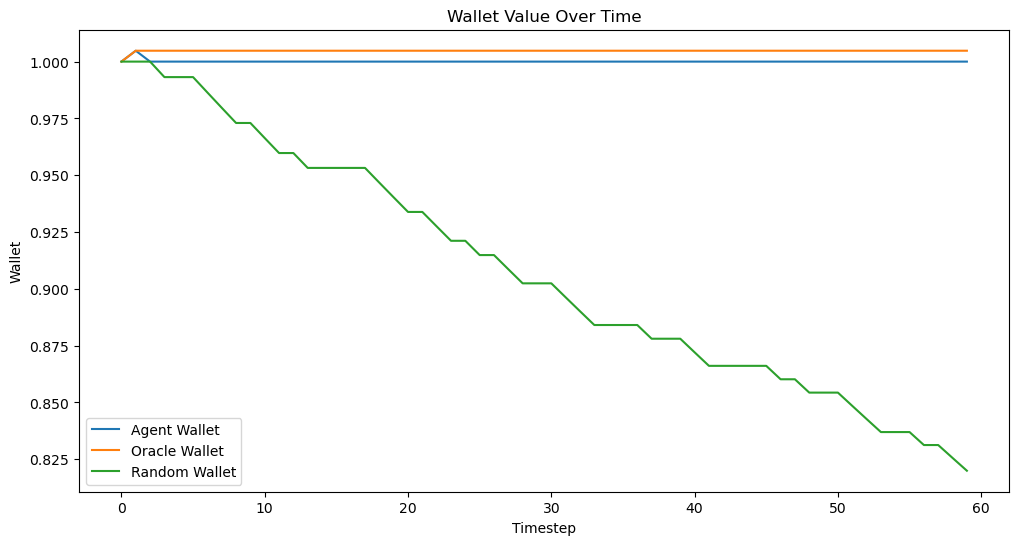

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Simulated env, for the sake of placeholder setup
class DummyEnv:
    def __init__(self):
        self.n_timesteps = 60
        self.prices = np.cumprod(1 + np.random.randn(self.n_timesteps) * 0.01)
        self.step_idx = 0
        self.position = 0
        self.wallet = 1.0
        self.holding_time = 0
        self.entry_price = 0
        self.done = False

    def reset(self):
        self.step_idx = 0
        self.position = 0
        self.wallet = 1.0
        self.holding_time = 0
        self.entry_price = 0
        self.done = False
        return self._get_obs(), {}

    def step(self, action):
        price_now = self.prices[self.step_idx]
        price_next = self.prices[self.step_idx + 1] if self.step_idx + 1 < len(self.prices) else price_now
        price_diff = price_next - price_now

        # Simulated reward logic
        oracle_action = 1 if price_diff > 0 else 0
        anti_action = 1 - oracle_action

        weight = 1.0 / self.n_timesteps
        oracle_reward = weight * np.abs(price_diff) * 100
        anti_reward = -oracle_reward
        agent_reward = oracle_reward if action == oracle_action else anti_reward

        self.wallet *= (1 + (price_diff / price_now) if action == 1 else 1)

        self.step_idx += 1
        self.done = self.step_idx >= self.n_timesteps - 1
        return self._get_obs(), agent_reward, self.done, False, {}

    def _get_obs(self):
        return np.array([self.prices[self.step_idx]])

# Initialize
env = DummyEnv()
obs, _ = env.reset()

# Trackers
oracle_wallet = [1.0]
random_wallet = [1.0]
agent_wallet = [env.wallet]
oracle_rewards = []
random_rewards = []
agent_rewards = []

# Debug loop
for t in range(env.n_timesteps - 1):
    price_now = env.prices[env.step_idx]
    price_next = env.prices[env.step_idx + 1]
    price_diff = price_next - price_now
    oracle_action = 1 if price_diff > 0 else 0
    anti_action = 1 - oracle_action
    random_action = np.random.choice([0, 1])

    # Simulate agent taking oracle_action
    obs, oracle_reward, _, _, _ = env.step(oracle_action)
    oracle_rewards.append(oracle_reward)
    oracle_wallet.append(oracle_wallet[-1] * (1 + (price_diff / price_now) if oracle_action == 1 else 1))

    # Reset for agent
    env.reset()

    # Simulate random agent
    _, random_reward, _, _, _ = env.step(random_action)
    random_rewards.append(random_reward)
    random_wallet.append(random_wallet[-1] * (1 + (price_diff / price_now) if random_action == 1 else 1))

    # Reset for agent
    env.reset()

    # Simulate your agent (as oracle for placeholder)
    _, agent_reward, _, _, _ = env.step(oracle_action)
    agent_rewards.append(agent_reward)
    agent_wallet.append(env.wallet)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(agent_wallet, label="Agent Wallet")
ax.plot(oracle_wallet, label="Oracle Wallet")
ax.plot(random_wallet, label="Random Wallet")
ax.set_title("Wallet Value Over Time")
ax.set_xlabel("Timestep")
ax.set_ylabel("Wallet")
ax.legend()

import ace_tools as tools; tools.display_dataframe_to_user(name="Debug Wallet Tracker", dataframe=pd.DataFrame({
    "oracle_rewards": oracle_rewards,
    "random_rewards": random_rewards,
    "agent_rewards": agent_rewards,
    "oracle_wallet": oracle_wallet[1:],
    "random_wallet": random_wallet[1:],
    "agent_wallet": agent_wallet[1:]
}))


0


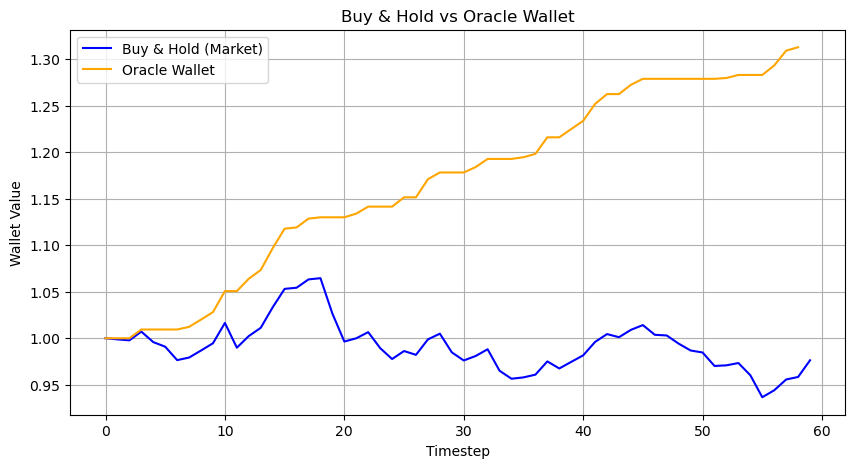

In [24]:
import matplotlib.pyplot as plt
from environments import PositionTradingEnvV2  # or whichever you’re using

# --- Setup
env = PositionTradingEnvV2(full_df=OHLCV_DF, ticker='AAPL', n_timesteps=60,start_idx=400)
env.reset()
print(env.step_idx)
# --- Run oracle
done = False
while not done:
    idx = env.step_idx
    curr_price = env.prices[idx]
    next_price = env.prices[min(idx + 1, len(env.prices) - 1)]
    action = 1 if next_price > curr_price else 0
    _, _, done, _, _ = env.step(action)

# --- Compute market (buy & hold)
market_wallet = env.prices / env.prices[0]
oracle_wallet = env.wallet_progress[:len(market_wallet)]

# --- Plot
plt.figure(figsize=(10, 5))
plt.plot(market_wallet, label="Buy & Hold (Market)", color='blue')
plt.plot(oracle_wallet, label="Oracle Wallet", color='orange')
plt.title("Buy & Hold vs Oracle Wallet")
plt.xlabel("Timestep")
plt.ylabel("Wallet Value")
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='date'>

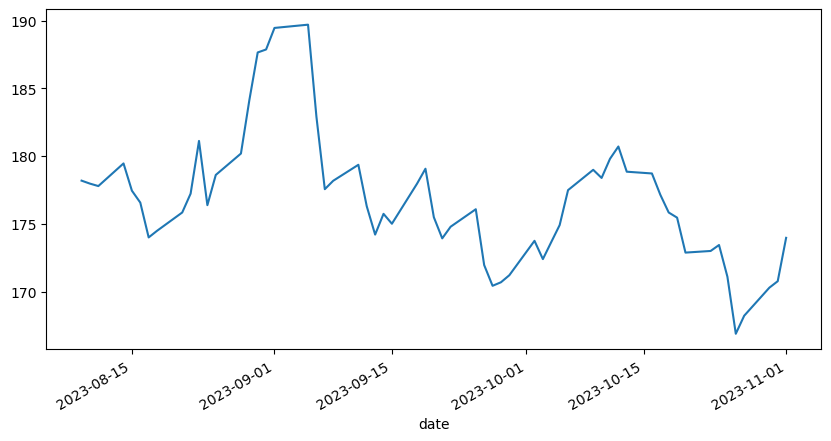

In [27]:
OHLCV_DF[OHLCV_DF['symbol']=="AAPL"].set_index('date').iloc[400:460]['close'].plot(figsize=(10, 5))

In [26]:
env.episode_df

,id,symbol,timestamp,date,open,high,low,close,volume,trade_count,...,vwap_change,trade_count_change,sector_id,industry_id,return_1d,vix,vix_norm,sp500,sp500_norm,market_return_1d
0,33824,AAPL,2023-08-09 04:00:00,2023-08-09,180.870,180.9300,177.010,178.19,60386755.0,666321.0,...,-0.003012,-0.060506,10.0,unknown,-0.008954,0.1596,-0.001876,44.6771,-0.007039,-0.007039
1,33825,AAPL,2023-08-10 04:00:00,2023-08-10,179.480,180.7500,177.600,177.97,54695861.0,653105.0,...,0.001993,-0.019834,10.0,unknown,-0.001235,0.1585,-0.006892,44.6883,0.000251,0.000251
2,33826,AAPL,2023-08-11 04:00:00,2023-08-11,177.320,178.6200,176.550,177.79,52036674.0,586486.0,...,-0.005788,-0.102004,10.0,unknown,-0.001011,0.1484,-0.063722,44.6405,-0.001070,-0.001070
3,33827,AAPL,2023-08-14 04:00:00,2023-08-14,177.970,179.6900,177.305,179.46,43690884.0,565211.0,...,0.006423,-0.036275,10.0,unknown,0.009393,0.1482,-0.001348,44.8972,0.005750,0.005750
4,33828,AAPL,2023-08-15 04:00:00,2023-08-15,178.880,179.4800,177.050,177.45,43635379.0,510238.0,...,-0.005787,-0.097261,10.0,unknown,-0.011200,0.1646,0.110661,44.3786,-0.011551,-0.011551
5,33829,AAPL,2023-08-16 04:00:00,2023-08-16,177.130,178.5400,176.500,176.57,46979752.0,526310.0,...,-0.002359,0.031499,10.0,unknown,-0.004959,0.1678,0.019441,44.0433,-0.007555,-0.007555
6,33830,AAPL,2023-08-17 04:00:00,2023-08-17,177.140,177.5054,173.480,174.00,66700735.0,673488.0,...,-0.015926,0.279641,10.0,unknown,-0.014555,0.1789,0.066150,43.7036,-0.007713,-0.007713
7,33831,AAPL,2023-08-18 04:00:00,2023-08-18,172.300,175.1000,171.960,174.49,61173170.0,596487.0,...,-0.004545,-0.114332,10.0,unknown,0.002816,0.1730,-0.032979,43.6971,-0.000149,-0.000149
8,33832,AAPL,2023-08-21 04:00:00,2023-08-21,175.070,176.1300,173.735,175.84,46323343.0,559827.0,...,0.007843,-0.061460,10.0,unknown,0.007737,0.1713,-0.009827,43.9977,0.006879,0.006879
9,33833,AAPL,2023-08-22 04:00:00,2023-08-22,177.060,177.6800,176.250,177.23,42091932.0,501637.0,...,0.010205,-0.103943,10.0,unknown,0.007905,0.1697,-0.009340,43.8755,-0.002777,-0.002777
